<a href="https://colab.research.google.com/github/ramonatobey-sbu/ams595/blob/main/HW5AMS595.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#part one, PageRank

import numpy as np
from scipy import linalg
#defining the initial matrix
M = np.array([[0,0,1/2,0],[1/3,0,0,1/2],[1/3,1/2,0,1/2],[1/3,1/2,1/2,0]])
#finding the eigenvalues and vectors
eigenvalues, eigenvectors = linalg.eig(M)
absEigenValues = abs(eigenvalues)
vectorIndex = np.argmax(absEigenValues)
#take the dominant eigenvector to be the one corresponding to the
#greatest eigenvalue
dominantEigenvector = abs(eigenvectors[:,vectorIndex])
normalDE = dominantEigenvector/dominantEigenvector.sum()
print(normalDE)
initialVector = np.array([1,1,1,1])
diff = 1.1

#need to keep going until difference is small between dot products
while diff > .001:
  newVector = np.dot(initialVector,M.T)
  diff = max(abs(newVector - initialVector))
  initialVector = newVector
vectorSum = initialVector.sum(axis = 0)
initialVector = initialVector/vectorSum
print(initialVector)

#The entries represent the proability over a long time of each page being
#ranked first. Based off of the page rank scores, it looks like the third page
#and the fourth page both have the highest rank of being ranked number one

[0.15789474 0.21052632 0.31578947 0.31578947]
[0.15784144 0.21050347 0.31582755 0.31582755]


0.9999999999999997
[[0.9275241  1.33374897]]


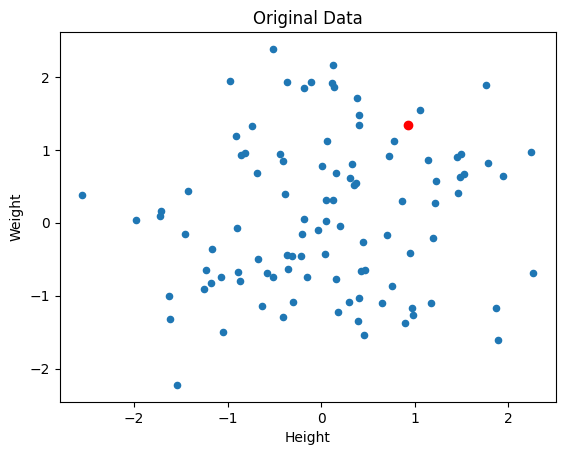

In [123]:
#Part two, Dimensionality Reduction via PCA
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
covData = np.cov(df)
eigenvalues, eigenvectors = linalg.eig(covData)

#the principle components should be the eigenvector corresponding to the
#greatest eigenvalues
absEigenValues = abs(eigenvalues)
eSum = absEigenValues.sum()
vectorIndex = np.argmax(absEigenValues)
dominantEigenvector = abs(eigenvectors[:,vectorIndex])
# Reshape dominantEigenvector to be a 100 x 1 array because my dot product
#wasn't working
dominantEigenvector = dominantEigenvector.reshape(100, 1)
#print(dominantEigenvector)
#This is how I test how signifigant the first principle component is

percentVar = absEigenValues[vectorIndex]/eSum
print(percentVar)

#Because it is very close to 100% I don't need to look at the other components,
#this eigenvector represents the variance in the dataset

projectedData = np.dot(dominantEigenvector.T,df)
print(projectedData)
#now I will plot the data to compare
df.plot.scatter(x='Height', y='Weight')
plt.plot(0.9275241,1.33374897, 'ro')
plt.title('Original Data')
plt.show()

In [118]:
#Part three Linear Regression via Least Squares
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt

houseDataT = np.array([[2100,2500,1800,2200],[3,4,2,3],[20,15,30,25]])
houseData = houseDataT.T
housePricesT = np.array([460,540,330,500])
housePrices = housePricesT.T
#the setup:
#np.dot(houseData,coeffBeta)=housePrices
coeffBeta, residuals, rank, s = np.linalg.lstsq(houseData, housePrices, rcond=None)
#now, using this result, let's predict the price of house A
A = np.array([2400,3,20])
print("Predicted price for House A")
print(np.dot(A,coeffBeta))
#this seems like a very bad estimate.
#I tried reducing the data to 3x3 to use linalg.solve and got this as a result:

houseDataMod = np.array([[2100,2500,1800],[3,4,2],[20,15,30]])
houseDataMod = houseDataMod.T
housePricesMod = np.array([460,540,330])
housePricesMod = housePricesMod.T
x = linalg.solve(houseDataMod, housePricesMod)
print("Predicted price for House A using linAlgSolve")
print(np.dot(A,x))

#This also seems like a pretty bad estimate.
#So, I guess least square was a bit better but it seems hard when the values are
#in such different ranges and we don't have that much data to get a really
#accurate prediction


Predicted price for House A
111.2499999999659
Predicted price for House A using linAlgSolve
1314.9999999999889


In [140]:
#part four Gradient Descent for Minimizing Loss Function
import numpy as np
from scipy.optimize import minimize


Xinit = np.random.randn(100,50)
A = np.random.randn(100,50)

varX = Xinit.flatten()
#X = minimize(fun=lossFunction(X,A), x0=varX, jac=gradient, method='BFGS',
#options={"maxiter": 1})
def lossFunction(X,A):
  X=X.reshape(100,50)
  total = 0
  rows, cols = X.shape
  for i in range(rows):
    for j in range(cols):
        total = total + (X[i,j]-A[i,j])**2
  return total/2

def gradient(X,A):
  X=X.reshape(100,50)
  total = 0
  rows, cols = X.shape
  for i in range(rows):
    for j in range(cols):
        total = total + (X[i,j]-A[i,j])
  return total
